In [306]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image

In [307]:
def save_picture(filename, source):
  image = Image.fromarray(np.uint8(source))
  image.save('./'+filename, dpi=(200, 200))

def constrast_stretching(source):
  min = np.min(source)
  max = np.max(source)
  L = 256
  source = (source - min) / (max - min) * (L - 1)
  return source.astype(np.uint8)

def print_hist(img):
    img = img.flatten()
    img = img.tolist()
    myhist = []
    for i in range(0, 256):
        myhist.append(img.count(i))
    plt.figure()
    plt.bar(x=range(0, 256), height=myhist, width=0.5)
    plt.title('Histogram')
    plt.xlabel("Gray level")
    plt.ylabel("Number of pixels")
    plt.show()

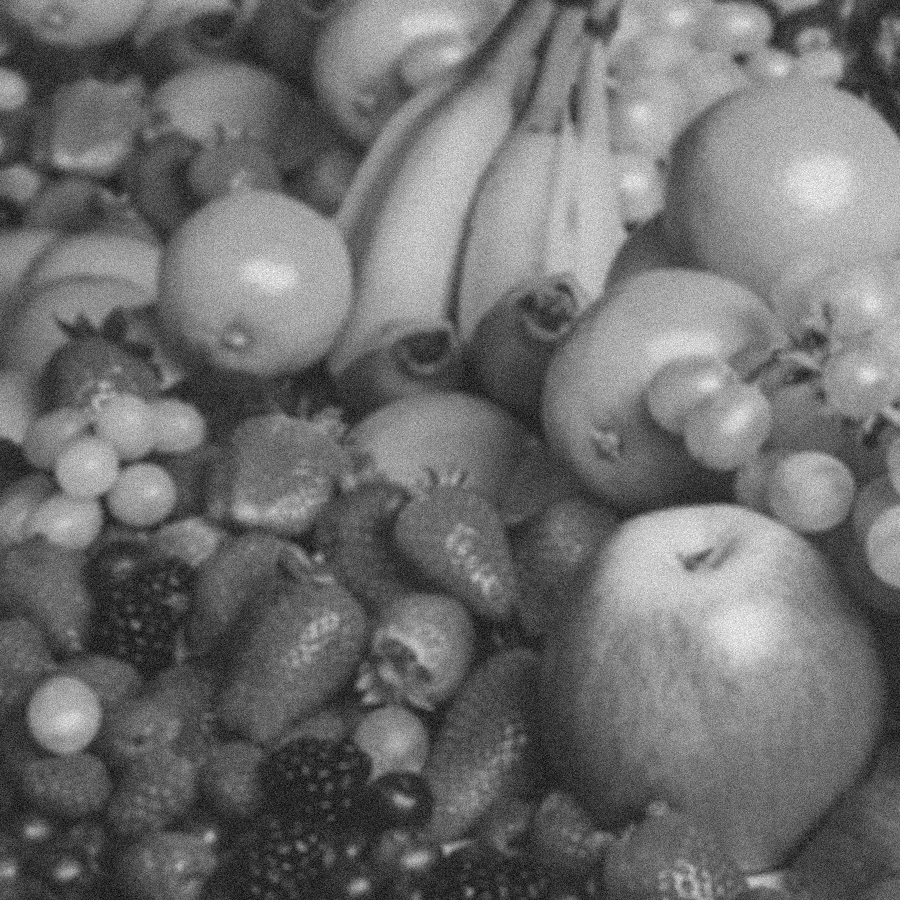

In [308]:
#original
original = cv2.imread('fruit blurred-noisy.tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(constrast_stretching(original))

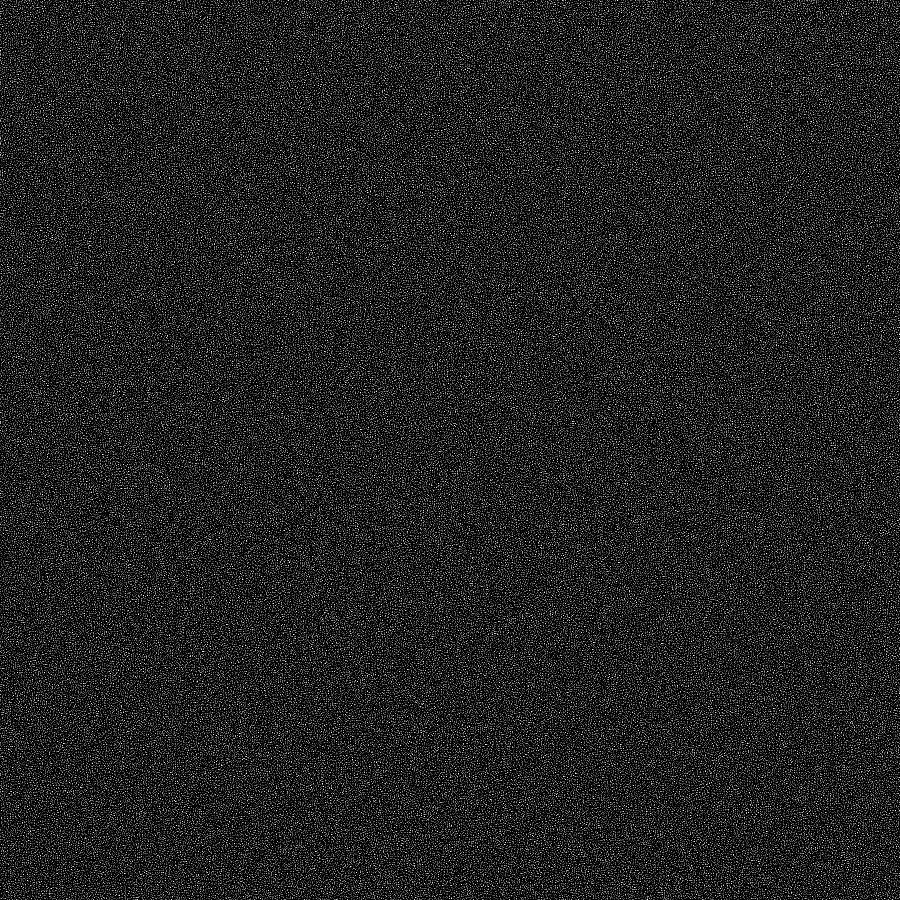

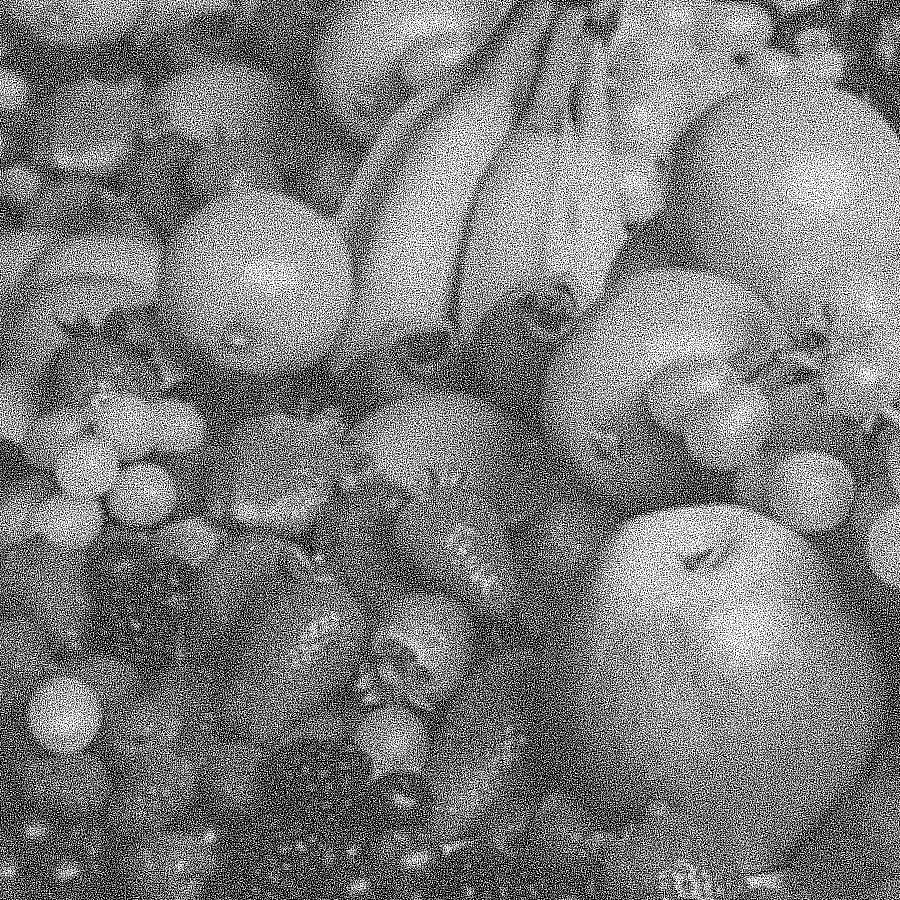

In [309]:
#Laplacian
kernel = np.array([[-1, -1, -1],
          [-1, 8, -1],
          [-1, -1, -1]])
Laplacian = cv2.filter2D(original, ddepth=-1, kernel=kernel)
cv2_imshow(constrast_stretching(np.abs(Laplacian)))

#Laplacian sharpen
kernel = np.array([[-1, -1, -1],
          [-1, 9.1, -1],
          [-1, -1, -1]])
Laplacian_sharpen = cv2.filter2D(original, ddepth=-1, kernel=kernel)
cv2_imshow(constrast_stretching(Laplacian_sharpen))

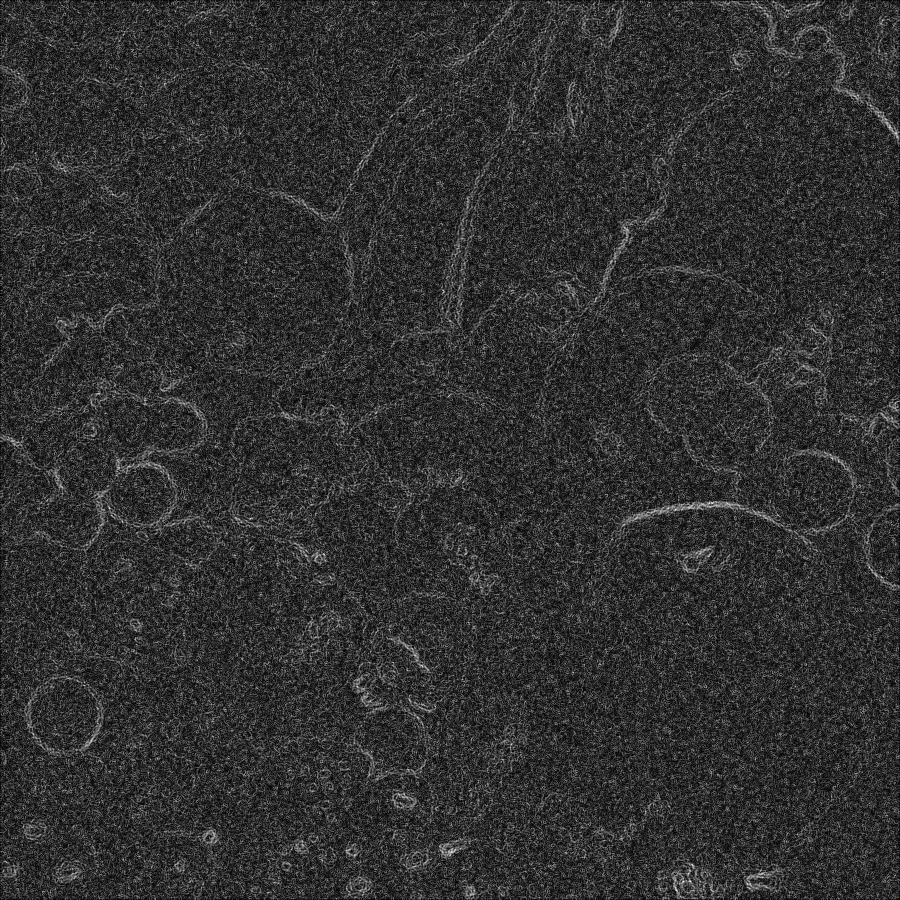

In [310]:
#Sobel gradient
# kernel = np.array([[-1, 0, 1],
#           [-2, 0, 2],
#           [-1, 0, 1]])
# gy = cv2.filter2D(original, ddepth=-1, kernel=kernel)

# kernel = np.array([[-1, -2, -1],
#           [0, 0, 0],
#           [1, 2, 1]])

# gx = cv2.filter2D(original, ddepth=-1, kernel=kernel)
x = cv2.Sobel(original, cv2.CV_16S, 1, 0)
y = cv2.Sobel(original, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

Sobel_gradient = cv2.addWeighted(absX, 0.5, absY,0.5,0)
cv2_imshow(constrast_stretching(Sobel_gradient))

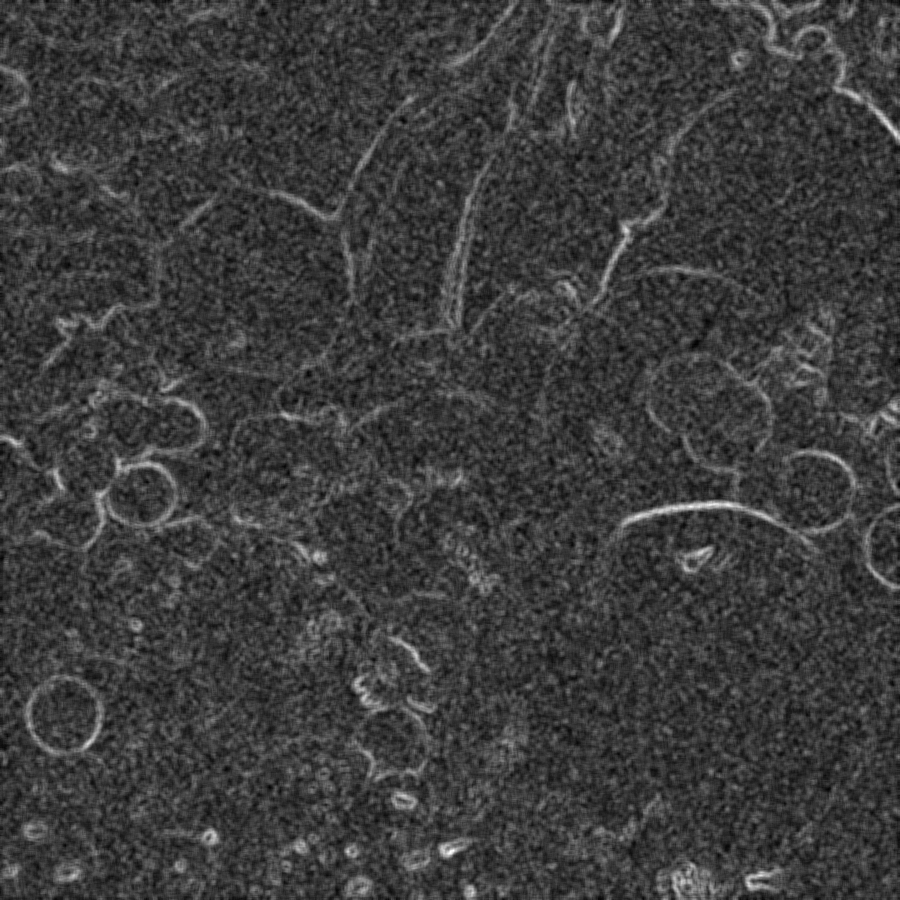

In [311]:
#smooth gradient

kernel = np.ones([5, 5]) / 25
smooth_gradient = cv2.filter2D(Sobel_gradient, ddepth=-1, kernel=kernel)
cv2_imshow(constrast_stretching(smooth_gradient))

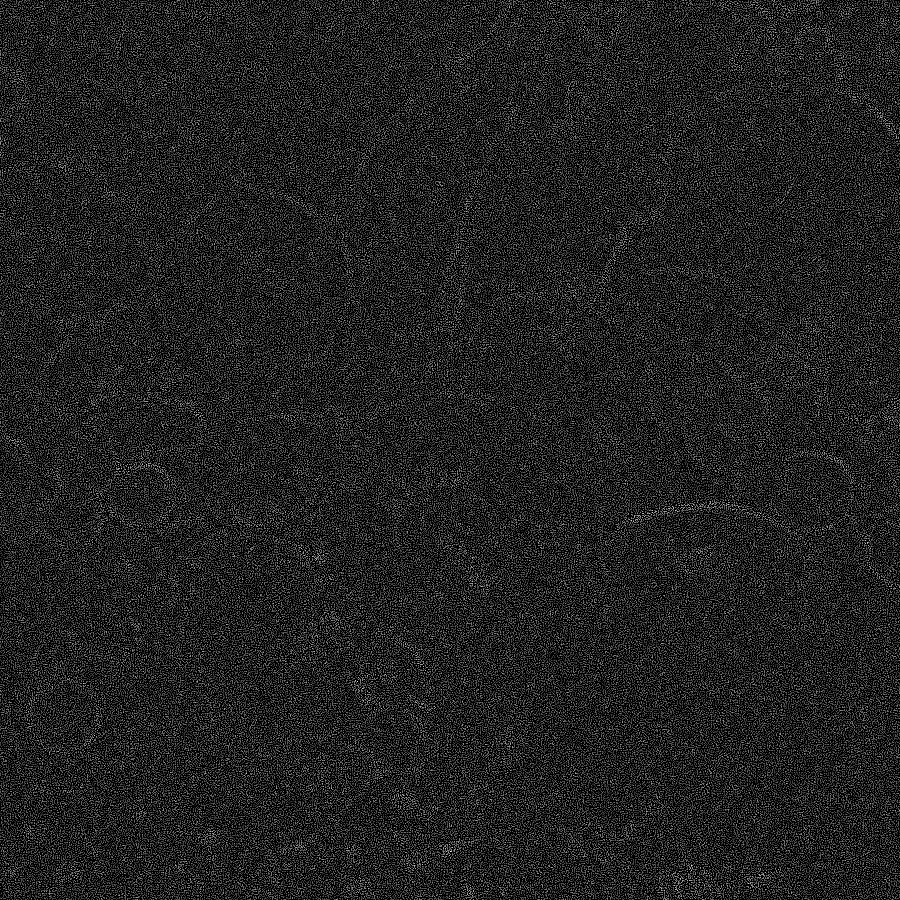

In [312]:
#extracted feature

extracted_feature = cv2.multiply(np.sqrt(smooth_gradient).astype(np.uint8),np.sqrt(Laplacian).astype(np.uint8))
cv2_imshow(constrast_stretching(extracted_feature))

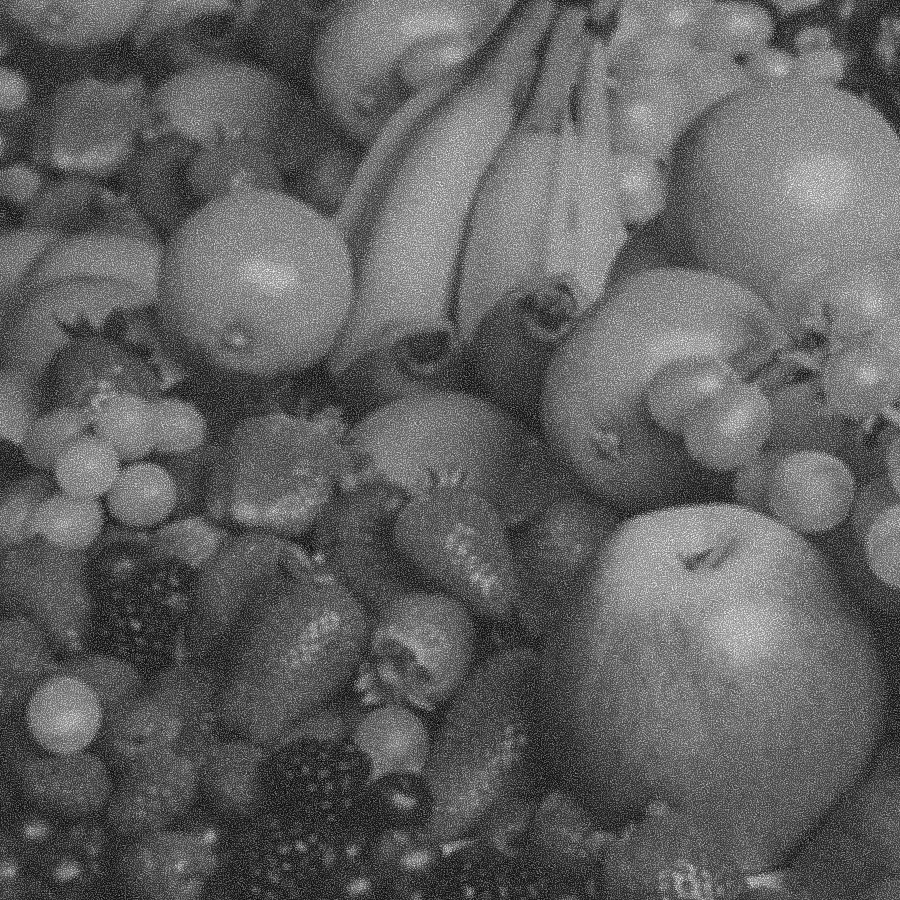

In [313]:
g = cv2.addWeighted(original, 0.5, extracted_feature,0.5,0)
cv2_imshow(constrast_stretching(g))

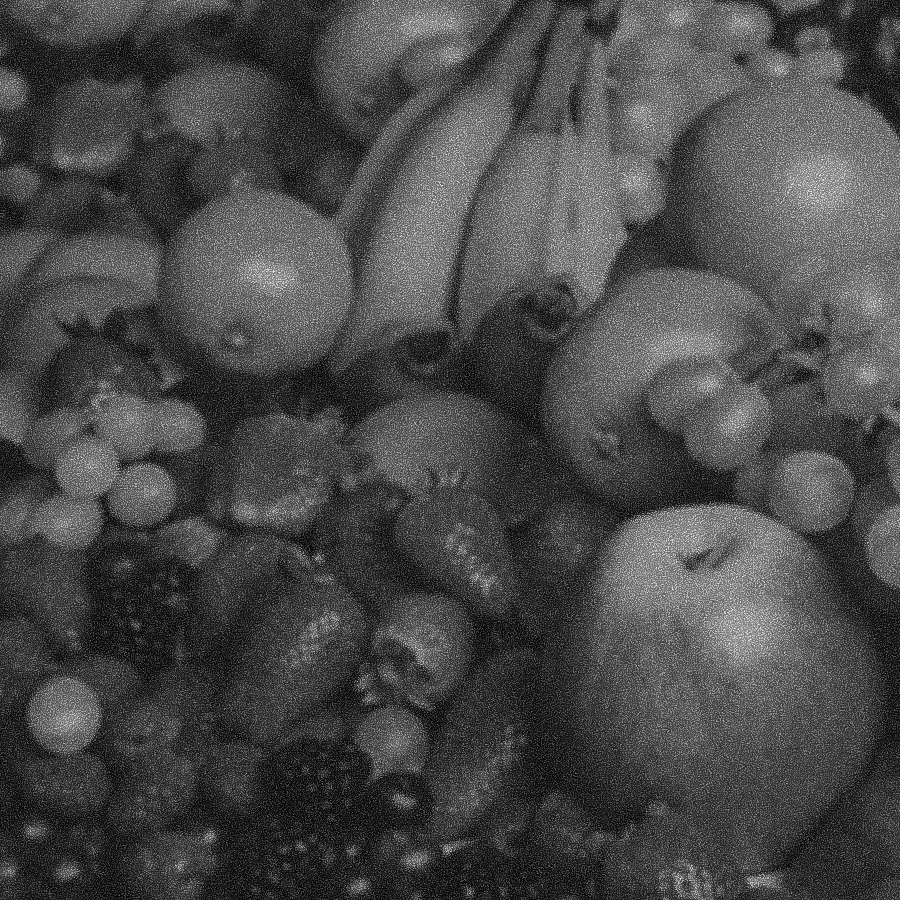

In [314]:
#power law
h = np.array(255*(g / 255) ** 1.4)
h = cv2.convertScaleAbs(h)
cv2_imshow(constrast_stretching(h))